# Real-world Data Wrangling

## 1. Gather data

In this section, you will extract data using two different data gathering methods and combine the data. Use at least two different types of data-gathering methods.

### **1.1.** Problem Statement

Lets check if this data set contains valid data for all attributes relevant to me. 
- The following are relevant for me budget, revenue. So that I can calculate profit. 
- Also relevant is the popularity so that I can check if the profit depens on popularity.
- I want to see the overall correlation

### **1.2.** Gather at least two datasets using two different data gathering methods

In [1]:
import pandas as pd
import numpy as np
import requests
import json
import matplotlib.pyplot as plt
import os
import seaborn as sns

#### **Dataset 1**

I choosed this data set because it is an interesting data set which shows 5000 movies with rating, budget, revenue etc. It is interesting to get a quick overview of what the films have brought in

In [2]:
#download manually and uploaded in project
file_path = "Data/tmdb_5000_movies.csv"
tmdb_movies = pd.read_csv(file_path)
tmdb_movies.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


#### Dataset 2

I chosed this data set because it is the perfect counterpart to the movies data set :)

In [3]:
# Download file using Requests library via URL provided 
url = 'https://raw.githubusercontent.com/andandandand/CSV-datasets/master/tmdb_5000_credits.csv'
#Create an HTTP GET request for Ebert reviews
response = requests.get(url)
#Raise an exception if we made a request resulting in an error
response.raise_for_status()
#Define the filepath by incorporating the folder_name and the last part of the url
file_path = os.path.join('Data/', url.split('/')[-1])
print(file_path)

Data/tmdb_5000_credits.csv


In [4]:
# Save the file
with open(file_path, mode = 'wb') as file:
    file.write(response.content)

In [5]:
# Read TSV file into DataFrame
tmdb_credits = pd.read_csv(file_path)
tmdb_credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


Optional data storing step: You may save your raw dataset files to the local data store before moving to the next step.

In [6]:
#Optional: store the raw data in your local data store
tmdb_credits_clean = tmdb_credits.copy()
tmdb_movies_clean = tmdb_movies.copy()

print(tmdb_credits_clean.shape)
print(tmdb_movies_clean.shape)

(4803, 4)
(4803, 20)


## 2. Assess data

### Data quality dimensions:

#### Examples of Data Quality Issues:

- Missing data: Missing cells in your spreadsheet, or `NaN` values in your DataFrame.

- Invalid data: Negative values in `Age` column of your DataFrame.

- Inaccurate data: Values in `Age` column that are 200 years old.

- Inconsistent data: Some values in `temprature` column are in Celsius, others are in Fahrenheit.

- Duplicate data: two rows for the same customer in your `churn` DataFrame.


#### Examples of Data Tidiness Issues:Any dataset that doesn't follow these three rules:

- Each variable forms a column

- Each observation forms a row

- Each type of observational unit forms a table

# TMDB MOVIES

In [7]:
#FILL IN - inspect the first 3 rows 
tmdb_movies.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466


In [8]:
#Visually inspect the info() results 
tmdb_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [9]:
tmdb_movies.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


In [10]:
#check if null values
tmdb_movies.isnull().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

In [11]:
sum(tmdb_movies.duplicated())

0

In [12]:
tmdb_movies.nunique()

budget                   436
genres                  1175
homepage                1691
id                      4803
keywords                4222
original_language         37
original_title          4801
overview                4800
popularity              4802
production_companies    3697
production_countries     469
release_date            3280
revenue                 3297
runtime                  156
spoken_languages         544
status                     3
tagline                 3944
title                   4800
vote_average              71
vote_count              1609
dtype: int64

# TMDB CREDITS

In [13]:
tmdb_credits

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."
...,...,...,...,...
4798,9367,El Mariachi,"[{""cast_id"": 1, ""character"": ""El Mariachi"", ""c...","[{""credit_id"": ""52fe44eec3a36847f80b280b"", ""de..."
4799,72766,Newlyweds,"[{""cast_id"": 1, ""character"": ""Buzzy"", ""credit_...","[{""credit_id"": ""52fe487dc3a368484e0fb013"", ""de..."
4800,231617,"Signed, Sealed, Delivered","[{""cast_id"": 8, ""character"": ""Oliver O\u2019To...","[{""credit_id"": ""52fe4df3c3a36847f8275ecf"", ""de..."
4801,126186,Shanghai Calling,"[{""cast_id"": 3, ""character"": ""Sam"", ""credit_id...","[{""credit_id"": ""52fe4ad9c3a368484e16a36b"", ""de..."


In [14]:
#Visually inspect the info() results 
tmdb_credits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  4803 non-null   int64 
 1   title     4803 non-null   object
 2   cast      4803 non-null   object
 3   crew      4803 non-null   object
dtypes: int64(1), object(3)
memory usage: 150.2+ KB


In [15]:
tmdb_credits.describe()

,movie_id
count,4803.000000
mean,57165.484281
std,88694.614033
min,5.000000
25%,9014.500000
50%,14629.000000
75%,58610.500000
max,459488.000000


In [16]:
#check if null values
tmdb_credits.isnull().sum()

movie_id    0
title       0
cast        0
crew        0
dtype: int64

In [17]:
#check if title is duplicate
tmdb_credits.title.duplicated().sum()

3

In [18]:
print(tmdb_credits.title.value_counts())

The Host                 2
Batman                   2
Out of the Blue          2
Avatar                   1
The Girl on the Train    1
                        ..
Step Up 3D               1
Secondhand Lions         1
The Age of Adaline       1
Drag Me to Hell          1
My Date with Drew        1
Name: title, Length: 4800, dtype: int64


In [19]:
tmdb_credits.nunique()

movie_id    4803
title       4800
cast        4761
crew        4776
dtype: int64

# Quality Issues:

# TMDB MOVIES

- A lot of data are null eg. homepage, imdb_id and so on (remove unecessary data)
- 4803 movies in total, there are only 4800 unique titles which suggest the presence of duplicates
- release_date variable could be of the form datetime

# TMDB CREDITS

- 4803 movies ids in total, there are only 4800 unique titles which suggest the presence of duplicates

# Tidiness Issues

## TMDB MOVIES

- genres re a struct and have and the content could be converted into a separate column only with genres in it, remove id

## TMDB CREDITS

- Cast are a struct and the content could be converted into a separate column only with cast members in it...removed unnecessary values

## 3. Clean data
Clean the data to solve the 4 issues corresponding to data quality and tidiness found in the assessing step. **Make sure you include justifications for your cleaning decisions.**

After the cleaning for each issue, please use **either** the visually or programatical method to validate the cleaning was succesful.

At this stage, you are also expected to remove variables that are unnecessary for your analysis and combine your datasets. Depending on your datasets, you may choose to perform variable combination and elimination before or after the cleaning stage. Your dataset must have **at least** 4 variables after combining the data.

## TMDB MOVIES

#### Issue 0: Transform genre struct to one string attribute

In [20]:
#loop over each entry and convert it in seperate dataframe
# then combie each genre to one string and add to GenreList

def filterFunc(data, value1):
    tempList = []
    for x in data:
     # Create DataFrame from list
     df = pd.DataFrame(eval(x))
     if df.empty == False:
        tempList.append(' '.join(df[value1]))
     else:
        tempList.append('no value')
    return tempList

In [21]:
genres = tmdb_movies_clean['genres']
keywords = tmdb_movies_clean['keywords']
language = tmdb_movies_clean['spoken_languages']
pcompanies = tmdb_movies_clean['production_companies']

In [22]:
GenreList = filterFunc(genres, 'name')
KeywordList = filterFunc(keywords, 'name')
LanguageList = filterFunc(language, 'name')
CompaniesList = filterFunc(pcompanies, 'name')

In [23]:
#Test
GenreList

['Action Adventure Fantasy Science Fiction',
 'Adventure Fantasy Action',
 'Action Adventure Crime',
 'Action Crime Drama Thriller',
 'Action Adventure Science Fiction',
 'Fantasy Action Adventure',
 'Animation Family',
 'Action Adventure Science Fiction',
 'Adventure Fantasy Family',
 'Action Adventure Fantasy',
 'Adventure Fantasy Action Science Fiction',
 'Adventure Action Thriller Crime',
 'Adventure Fantasy Action',
 'Action Adventure Western',
 'Action Adventure Fantasy Science Fiction',
 'Adventure Family Fantasy',
 'Science Fiction Action Adventure',
 'Adventure Action Fantasy',
 'Action Comedy Science Fiction',
 'Action Adventure Fantasy',
 'Action Adventure Fantasy',
 'Action Adventure',
 'Adventure Fantasy',
 'Adventure Fantasy',
 'Adventure Drama Action',
 'Drama Romance Thriller',
 'Adventure Action Science Fiction',
 'Thriller Action Adventure Science Fiction',
 'Action Adventure Science Fiction Thriller',
 'Action Adventure Thriller',
 'Action Adventure Fantasy',
 'Actio

In [24]:
#Add as new coloumn
tmdb_movies_clean['Genres'] = GenreList
tmdb_movies_clean['Keywords'] = KeywordList
tmdb_movies_clean['Language'] = LanguageList
tmdb_movies_clean['ProductionCompanies'] = CompaniesList

In [25]:
#Test
tmdb_movies_clean.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,spoken_languages,status,tagline,title,vote_average,vote_count,Genres,Keywords,Language,ProductionCompanies
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Action Adventure Fantasy Science Fiction,culture clash future space war space colony so...,English Español,Ingenious Film Partners Twentieth Century Fox ...


#### Issue 1: Remove unnecessary data

In [26]:
# Drop columns not required further for analysis
not_used_columns=['homepage', 'keywords', 'genres', 'original_language', 'original_title', 'overview', 'spoken_languages', 'status', 'production_companies', 'production_countries']
tmdb_movies_clean.drop(not_used_columns, axis=1, inplace=True)
tmdb_movies_clean.head(1)

,budget,id,popularity,release_date,revenue,runtime,tagline,title,vote_average,vote_count,Genres,Keywords,Language,ProductionCompanies
0,237000000,19995,150.437577,2009-12-10,2787965087,162.0,Enter the World of Pandora.,Avatar,7.2,11800,Action Adventure Fantasy Science Fiction,culture clash future space war space colony so...,English Español,Ingenious Film Partners Twentieth Century Fox ...


In [27]:
#test
tmdb_movies_clean.head(1)
print(tmdb_movies_clean.shape)

(4803, 14)


#### Issue 2: release_date variable could be of the form datetime

In [28]:
# question: Is it a good idea create attributes for year, month and day?
tmdb_movies_clean['release_date'] = pd.to_datetime(tmdb_movies_clean['release_date'])

In [29]:
#test
tmdb_movies_clean.dtypes

budget                          int64
id                              int64
popularity                    float64
release_date           datetime64[ns]
revenue                         int64
runtime                       float64
tagline                        object
title                          object
vote_average                  float64
vote_count                      int64
Genres                         object
Keywords                       object
Language                       object
ProductionCompanies            object
dtype: object

#### Issue 3: Remove SNA values

In [30]:
# drop nan but not in tagline because there could be movies without specific tagline
tmdb_movies_clean.dropna(subset = ['release_date', 'runtime'], inplace=True)

In [31]:
#test
tmdb_movies_clean.isnull().sum()

budget                   0
id                       0
popularity               0
release_date             0
revenue                  0
runtime                  0
tagline                841
title                    0
vote_average             0
vote_count               0
Genres                   0
Keywords                 0
Language                 0
ProductionCompanies      0
dtype: int64

#### Issue 4: 4803 movies in total, there are only 4800 unique titles which suggest the presence of duplicates

In [32]:
#check duplicates
tmdb_movies_clean[tmdb_movies_clean['title'].duplicated() == True]

,budget,id,popularity,release_date,revenue,runtime,tagline,title,vote_average,vote_count,Genres,Keywords,Language,ProductionCompanies
2877,11000000,1255,27.655270,2006-07-27,88489643,119.0,Monsters are real.,The Host,6.7,537,Horror Drama Science Fiction,river mobile phone bravery archer daughter sew...,한국어/조선말,Cineclick Asia Happinet Pictures Cheongeoram C...
3693,0,10844,0.706355,2006-10-12,0,103.0,The true story of a small town massacre,Out of the Blue,5.9,18,Drama,new zealand gun rampage police independent fil...,English,no value
4267,1377800,2661,9.815394,1966-07-30,0,105.0,He's Here Big As Life In A Real Bat-Epic,Batman,6.1,203,Family Adventure Comedy Science Fiction Crime,submarine dc comics missile shark attack rescu...,English,Twentieth Century Fox Film Corporation DC Comi...


In [33]:
#see all possible duplicates
title = tmdb_movies_clean["title"]
tmdb_movies_clean[title.isin(title[title.duplicated()])].sort_values("title")

,budget,id,popularity,release_date,revenue,runtime,tagline,title,vote_average,vote_count,Genres,Keywords,Language,ProductionCompanies
1359,35000000,268,44.104469,1989-06-23,411348924,126.0,Have you ever danced with the devil in the pal...,Batman,7.0,2096,Fantasy Action,double life dc comics dual identity chemical c...,English Français,PolyGram Filmed Entertainment The Guber-Peters...
4267,1377800,2661,9.815394,1966-07-30,0,105.0,He's Here Big As Life In A Real Bat-Epic,Batman,6.1,203,Family Adventure Comedy Science Fiction Crime,submarine dc comics missile shark attack rescu...,English,Twentieth Century Fox Film Corporation DC Comi...
3647,0,39269,0.679351,1980-05-01,0,94.0,A harrowing drama from the director of Easy Rider,Out of the Blue,6.5,17,Drama,punk independent film coming of age teenage gi...,English,Robson Street
3693,0,10844,0.706355,2006-10-12,0,103.0,The true story of a small town massacre,Out of the Blue,5.9,18,Drama,new zealand gun rampage police independent fil...,English,no value
972,44000000,72710,42.933027,2013-03-22,63327201,125.0,You will be one of us,The Host,6.0,1817,Action Adventure Romance Science Fiction Thriller,based on novel mass murder dystopia genocide a...,English,Nick Wechsler Productions Open Road Films Silv...
2877,11000000,1255,27.655270,2006-07-27,88489643,119.0,Monsters are real.,The Host,6.7,537,Horror Drama Science Fiction,river mobile phone bravery archer daughter sew...,한국어/조선말,Cineclick Asia Happinet Pictures Cheongeoram C...


As we can see, thats not a duplicate because of different taglines

#### Issue 5: Remove 0 values with their respective means

In [34]:
tmdb_movies_clean.query('revenue == 0 or budget == 0')

,budget,id,popularity,release_date,revenue,runtime,tagline,title,vote_average,vote_count,Genres,Keywords,Language,ProductionCompanies
83,27000000,79698,2.418535,2015-02-13,0,109.0,Love is longer than life.,The Lovers,4.8,34,Action Adventure Science Fiction Romance,no value,English,Corsan Bliss Media Limelight International Med...
135,150000000,7978,21.214571,2010-02-11,0,102.0,When the moon is full the legend comes to life,The Wolfman,5.5,549,Drama Horror Thriller,father son relationship victorian england rema...,English,Universal Pictures Stuber Productions Relativi...
265,0,10588,18.251129,2003-11-21,0,82.0,Don't mess with the hat.,The Cat in the Hat,4.9,366,Comedy Fantasy Family,cat brother sister relationship boredom chaos ...,English,Imagine Entertainment DreamWorks SKG Universal...
309,84000000,10214,17.815595,2005-02-18,0,94.0,Who's next?,Son of the Mask,3.6,338,Fantasy Comedy Family Adventure,baby mask viking,English,New Line Cinema Pathé Distribution
321,0,77953,16.460356,2012-08-09,104907746,85.0,May The Best Loser Win.,The Campaign,5.6,578,Comedy,politics politician election campaign north c...,English,Everyman Pictures Gary Sanchez Productions War...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4797,0,67238,0.022173,2005-03-12,0,80.0,NaN,Cavite,7.5,2,Foreign Thriller,no value,no value,no value
4799,9000,72766,0.642552,2011-12-26,0,85.0,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5,Comedy Romance,no value,no value,no value
4800,0,231617,1.444476,2013-10-13,0,120.0,NaN,"Signed, Sealed, Delivered",7.0,6,Comedy Drama Romance TV Movie,date love at first sight narration investigati...,English,Front Street Pictures Muse Entertainment Enter...
4801,0,126186,0.857008,2012-05-03,0,98.0,A New Yorker in Shanghai,Shanghai Calling,5.7,7,no value,no value,English,no value


In [35]:
# get mean
mean_rev = tmdb_movies_clean['revenue'].mean()
mean_bud = tmdb_movies_clean['budget'].mean()

In [36]:
tmdb_movies_clean.replace({'budget': {0: mean_bud}}, inplace = True)
tmdb_movies_clean.replace({'revenue': {0: mean_rev}}, inplace = True)

In [37]:
tmdb_movies_clean.query('revenue == 0 or budget == 0').count()

budget                 0
id                     0
popularity             0
release_date           0
revenue                0
runtime                0
tagline                0
title                  0
vote_average           0
vote_count             0
Genres                 0
Keywords               0
Language               0
ProductionCompanies    0
dtype: int64

#### Issue 6: Check 0 values in vote count

In [38]:
tmdb_movies_clean.query('vote_count == 0' )

,budget,id,popularity,release_date,revenue,runtime,tagline,title,vote_average,vote_count,Genres,Keywords,Language,ProductionCompanies
1464,2.906007e+07,310706,0.126738,2009-05-13,8.231205e+07,100.0,NaN,Black Water Transit,0.0,0,Drama Crime,no value,English,Capitol Films
3669,2.906007e+07,113406,0.407030,2012-04-28,8.231205e+07,0.0,Even Shakespeare didn't see this one coming.,Should've Been Romeo,0.0,0,Comedy Drama,no value,English,Phillybrook Films
3670,2.906007e+07,447027,0.028756,2015-10-27,8.231205e+07,88.0,NaN,Running Forever,0.0,0,Family,no value,no value,New Kingdom Pictures
3852,2.906007e+07,395766,0.042346,2016-04-29,8.231205e+07,200.0,NaN,The Secret,0.0,0,Drama,miniseries,no value,no value
3855,3.500000e+06,370662,1.618138,2015-09-04,8.231205e+07,100.0,Climate change for good.,Time to Choose,0.0,0,Documentary,climate change documentary,English,Representational Pictures
3960,2.906007e+07,170480,0.194848,2010-06-15,8.231205e+07,90.0,NaN,The Deported,0.0,0,Comedy Family,no value,English,no value
3967,3.000000e+00,79587,0.008263,2009-01-15,8.231205e+07,100.0,Comedy,Four Single Fathers,0.0,0,Drama Comedy,no value,Italiano English,Indiana Production Company
4051,2.906007e+07,433715,0.015295,2014-06-15,8.231205e+07,90.0,She never knew it could happen to her...,8 Days,0.0,0,Thriller Drama,christian film sex trafficking,English,After Eden Pictures
4065,2.100000e+06,364083,0.039007,2015-10-16,3.330000e+03,126.0,NaN,Mi America,0.0,0,Drama Crime,new york state hate crime,Español English,Industrial House Films
4068,2.906007e+07,371085,0.027801,2015-01-01,8.231205e+07,0.0,NaN,Sharkskin,0.0,0,no value,no value,no value,no value


In [39]:
# check shape
tmdb_movies_clean.shape

(4800, 14)

In [40]:
# Only values > 0
tmdb_movies_clean = tmdb_movies_clean[(tmdb_movies_clean['vote_count'] > 0)]

In [41]:
# test
tmdb_movies_clean.query('vote_count == 0')

,budget,id,popularity,release_date,revenue,runtime,tagline,title,vote_average,vote_count,Genres,Keywords,Language,ProductionCompanies


In [42]:
# test
tmdb_movies_clean.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.740000e+03,4740.000000,4740.000000,4.740000e+03,4740.000000,4740.000000,4740.000000
mean,3.547118e+07,54383.301477,21.776003,1.070751e+08,107.278059,6.171603,699.389241
std,3.811232e+07,84838.764926,31.931462,1.556235e+08,21.977580,0.976670,1240.181870
min,1.000000e+00,5.000000,0.000372,5.000000e+00,0.000000,0.000000,1.000000
25%,1.200000e+07,8973.750000,4.972527,2.718193e+07,94.000000,5.600000,58.000000
50%,2.906007e+07,14364.000000,13.290084,8.231205e+07,104.000000,6.200000,242.000000
75%,4.000000e+07,55576.250000,28.670264,9.422467e+07,118.000000,6.800000,750.250000
max,3.800000e+08,426469.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


## TMDB CREDITS

#### Issue 0: Transform cast struct to one string attribute

In [43]:
cast = tmdb_credits_clean['cast']

In [44]:
CastList = filterFunc(cast, 'character')

In [45]:
tmdb_credits_clean['Cast'] = CastList

In [46]:
tmdb_credits_clean.head(2)

,movie_id,title,cast,crew,Cast
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",Jake Sully Neytiri Dr. Grace Augustine Col. Qu...
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",Captain Jack Sparrow Will Turner Elizabeth Swa...


#### Issue 1: Drop the unnecessary columns

In [47]:
tmdb_credits_clean.drop(['crew', 'cast'], axis=1, inplace=True)

In [48]:
# Test
tmdb_credits_clean.head(2)

,movie_id,title,Cast
0,19995,Avatar,Jake Sully Neytiri Dr. Grace Augustine Col. Qu...
1,285,Pirates of the Caribbean: At World's End,Captain Jack Sparrow Will Turner Elizabeth Swa...


#### Issue 2: crosscheck duplicates in credits

In [49]:
#check duplicates
tmdb_credits_clean[tmdb_credits_clean['title'].duplicated() == True]

,movie_id,title,Cast
2877,1255,The Host,Park Gang-du Park Nam-il Park Nam-joo Park Hyu...
3693,10844,Out of the Blue,Nick Harvey Julie-Anne Bryson Garry Holden Dav...
4267,2661,Batman,Batman / Bruce Wayne Robin / Dick Grayson The ...


In [50]:
#see all possible duplicates
title = tmdb_credits_clean["title"]
tmdb_credits_clean[title.isin(title[title.duplicated()])].sort_values("title")

,movie_id,title,Cast
1359,268,Batman,Jack Napier/The Joker Bruce Wayne/Batman Vicki...
4267,2661,Batman,Batman / Bruce Wayne Robin / Dick Grayson The ...
3647,39269,Out of the Blue,Don Dr. Brean Kathy Cebe Charlie
3693,10844,Out of the Blue,Nick Harvey Julie-Anne Bryson Garry Holden Dav...
972,72710,The Host,Melanie Stryder / Wanda The Seeker / Lacey Ian...
2877,1255,The Host,Park Gang-du Park Nam-il Park Nam-joo Park Hyu...


Here again we have no duplicates. You can see from the cast that these are different films

#### Issue 3: change movie_id coloumn for better merge

In [51]:
tmdb_credits_clean = tmdb_credits_clean.rename(columns={'movie_id': 'id'})

# Merge data

In [52]:
# Take both the tmdb_credits_cleann and tmdb_movies_clean tables and merge into one table using the join() method on the columns tweet_id.
master = pd.merge(tmdb_movies_clean, tmdb_credits_clean, on=['title'], how='inner')

In [53]:
master = master.drop('id_y', axis=1)
master = master.rename(columns={'id_x': 'id'})

In [54]:
#test
master

,budget,id,popularity,release_date,revenue,runtime,tagline,title,vote_average,vote_count,Genres,Keywords,Language,ProductionCompanies,Cast
0,2.370000e+08,19995,150.437577,2009-12-10,2.787965e+09,162.0,Enter the World of Pandora.,Avatar,7.2,11800,Action Adventure Fantasy Science Fiction,culture clash future space war space colony so...,English Español,Ingenious Film Partners Twentieth Century Fox ...,Jake Sully Neytiri Dr. Grace Augustine Col. Qu...
1,3.000000e+08,285,139.082615,2007-05-19,9.610000e+08,169.0,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Adventure Fantasy Action,ocean drug abuse exotic island east india trad...,English,Walt Disney Pictures Jerry Bruckheimer Films S...,Captain Jack Sparrow Will Turner Elizabeth Swa...
2,2.450000e+08,206647,107.376788,2015-10-26,8.806746e+08,148.0,A Plan No One Escapes,Spectre,6.3,4466,Action Adventure Crime,spy based on novel secret agent sequel mi6 bri...,Français English Español Italiano Deutsch,Columbia Pictures Danjaq B24,James Bond Blofeld Madeleine M Lucia Q Moneype...
3,2.500000e+08,49026,112.312950,2012-07-16,1.084939e+09,165.0,The Legend Ends,The Dark Knight Rises,7.6,9106,Action Crime Drama Thriller,dc comics crime fighter terrorist secret ident...,English,Legendary Pictures Warner Bros. DC Entertainme...,Bruce Wayne / Batman Alfred Pennyworth James G...
4,2.600000e+08,49529,43.926995,2012-03-07,2.841391e+08,132.0,"Lost in our world, found in another.",John Carter,6.1,2124,Action Adventure Science Fiction,based on novel mars medallion space travel pri...,English,Walt Disney Pictures,John Carter Dejah Thoris Sola Tars Tarkas Tal ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2.200000e+05,9367,14.269792,1992-09-04,2.040920e+06,81.0,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238,Action Crime Thriller,united states–mexico barrier legs arms paper k...,Español,Columbia Pictures,El Mariachi Bigotón Mauricio (Moco) Azul Canti...
4742,9.000000e+03,72766,0.642552,2011-12-26,8.231205e+07,85.0,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5,Comedy Romance,no value,no value,no value,Buzzy Linda Marsha Katie Vanessa
4743,2.906007e+07,231617,1.444476,2013-10-13,8.231205e+07,120.0,NaN,"Signed, Sealed, Delivered",7.0,6,Comedy Drama Romance TV Movie,date love at first sight narration investigati...,English,Front Street Pictures Muse Entertainment Enter...,Oliver O’Toole Shane McInerney Rita Haywith No...
4744,2.906007e+07,126186,0.857008,2012-05-03,8.231205e+07,98.0,A New Yorker in Shanghai,Shanghai Calling,5.7,7,no value,no value,English,no value,Sam Amanda Donald Marcus Groff


In [55]:
# Get data type of each coloumn
master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4746 entries, 0 to 4745
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   budget               4746 non-null   float64       
 1   id                   4746 non-null   int64         
 2   popularity           4746 non-null   float64       
 3   release_date         4746 non-null   datetime64[ns]
 4   revenue              4746 non-null   float64       
 5   runtime              4746 non-null   float64       
 6   tagline              3950 non-null   object        
 7   title                4746 non-null   object        
 8   vote_average         4746 non-null   float64       
 9   vote_count           4746 non-null   int64         
 10  Genres               4746 non-null   object        
 11  Keywords             4746 non-null   object        
 12  Language             4746 non-null   object        
 13  ProductionCompanies  4746 non-nul

In [56]:
master.duplicated().sum()

0

In [57]:
#check sna values
master.isnull().sum()

budget                   0
id                       0
popularity               0
release_date             0
revenue                  0
runtime                  0
tagline                796
title                    0
vote_average             0
vote_count               0
Genres                   0
Keywords                 0
Language                 0
ProductionCompanies      0
Cast                     0
dtype: int64

In [58]:
#setting the DataFrame to index the title column
master = master.set_index('title')
master

,budget,id,popularity,release_date,revenue,runtime,tagline,vote_average,vote_count,Genres,Keywords,Language,ProductionCompanies,Cast
title,,,,,,,,,,,,,,
Avatar,2.370000e+08,19995,150.437577,2009-12-10,2.787965e+09,162.0,Enter the World of Pandora.,7.2,11800,Action Adventure Fantasy Science Fiction,culture clash future space war space colony so...,English Español,Ingenious Film Partners Twentieth Century Fox ...,Jake Sully Neytiri Dr. Grace Augustine Col. Qu...
Pirates of the Caribbean: At World's End,3.000000e+08,285,139.082615,2007-05-19,9.610000e+08,169.0,"At the end of the world, the adventure begins.",6.9,4500,Adventure Fantasy Action,ocean drug abuse exotic island east india trad...,English,Walt Disney Pictures Jerry Bruckheimer Films S...,Captain Jack Sparrow Will Turner Elizabeth Swa...
Spectre,2.450000e+08,206647,107.376788,2015-10-26,8.806746e+08,148.0,A Plan No One Escapes,6.3,4466,Action Adventure Crime,spy based on novel secret agent sequel mi6 bri...,Français English Español Italiano Deutsch,Columbia Pictures Danjaq B24,James Bond Blofeld Madeleine M Lucia Q Moneype...
The Dark Knight Rises,2.500000e+08,49026,112.312950,2012-07-16,1.084939e+09,165.0,The Legend Ends,7.6,9106,Action Crime Drama Thriller,dc comics crime fighter terrorist secret ident...,English,Legendary Pictures Warner Bros. DC Entertainme...,Bruce Wayne / Batman Alfred Pennyworth James G...
John Carter,2.600000e+08,49529,43.926995,2012-03-07,2.841391e+08,132.0,"Lost in our world, found in another.",6.1,2124,Action Adventure Science Fiction,based on novel mars medallion space travel pri...,English,Walt Disney Pictures,John Carter Dejah Thoris Sola Tars Tarkas Tal ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
El Mariachi,2.200000e+05,9367,14.269792,1992-09-04,2.040920e+06,81.0,"He didn't come looking for trouble, but troubl...",6.6,238,Action Crime Thriller,united states–mexico barrier legs arms paper k...,Español,Columbia Pictures,El Mariachi Bigotón Mauricio (Moco) Azul Canti...
Newlyweds,9.000000e+03,72766,0.642552,2011-12-26,8.231205e+07,85.0,A newlywed couple's honeymoon is upended by th...,5.9,5,Comedy Romance,no value,no value,no value,Buzzy Linda Marsha Katie Vanessa
"Signed, Sealed, Delivered",2.906007e+07,231617,1.444476,2013-10-13,8.231205e+07,120.0,NaN,7.0,6,Comedy Drama Romance TV Movie,date love at first sight narration investigati...,English,Front Street Pictures Muse Entertainment Enter...,Oliver O’Toole Shane McInerney Rita Haywith No...


In [59]:
# this method helps to see which variables correlate
master.corr(numeric_only = True)

,budget,id,popularity,revenue,runtime,vote_average,vote_count
budget,1.000000,-0.041647,0.457260,0.694627,0.229294,0.015608,0.555770
id,-0.041647,1.000000,0.055178,0.001554,-0.125487,-0.149309,0.014168
popularity,0.457260,0.055178,1.000000,0.599699,0.222053,0.283211,0.777159
revenue,0.694627,0.001554,0.599699,1.000000,0.211129,0.158080,0.746336
runtime,0.229294,-0.125487,0.222053,0.211129,1.000000,0.361166,0.272135
vote_average,0.015608,-0.149309,0.283211,0.158080,0.361166,1.000000,0.340310
vote_count,0.555770,0.014168,0.777159,0.746336,0.272135,0.340310,1.000000


## 4. Update your data store
Update your local database/data store with the cleaned data, following best practices for storing your cleaned data:

- Must maintain different instances / versions of data (raw and cleaned data)
- Must name the dataset files informatively
- Ensure both the raw and cleaned data is saved to your database/data store

In [60]:
# save the cleaned files
master.to_csv('Data/master_clean.csv') 
tmdb_movies_clean.to_csv('Data/tmdb_movies_clean.csv')  
tmdb_credits_clean.to_csv('Data/tmdb_credits_clean.csv')  

## 5. Answer the research question

### **5.1:** Define and answer the research question 
Going back to the problem statement in step 1, use the cleaned data to answer the question you raised. Produce **at least** two visualizations using the cleaned data and explain how they help you answer the question.

#### Correlation with cleaned data between prfit and popularity

In [61]:
tmdb_movies_clean['Profit'] = tmdb_movies_clean['revenue'] - tmdb_movies_clean['budget']

y = tmdb_movies_clean['Profit']
x = tmdb_movies_clean['popularity']
correlation = y.corr(x)
print(correlation)

0.5750270072005552


Text(0, 0.5, 'profit')

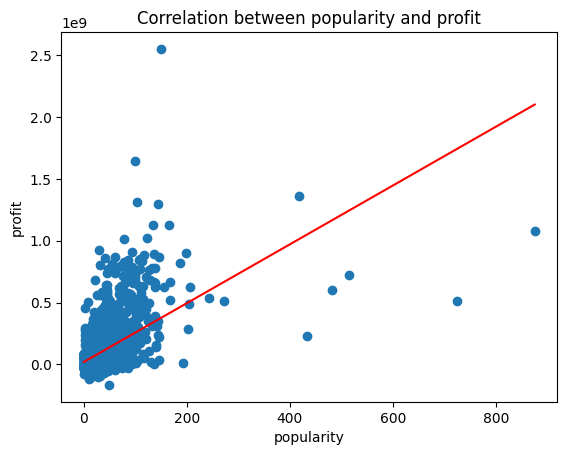

In [62]:
# adds the title
plt.title('Correlation between popularity and profit')
 
# plot the data
plt.scatter(x, y)
 
# fits the best fitting line to the data
plt.plot(np.unique(x), 
         np.poly1d(np.polyfit(x, y, 1))
         (np.unique(x)), color='red')
 
# Labelling axes
plt.xlabel('popularity')
plt.ylabel('profit')

#### Overall correlation

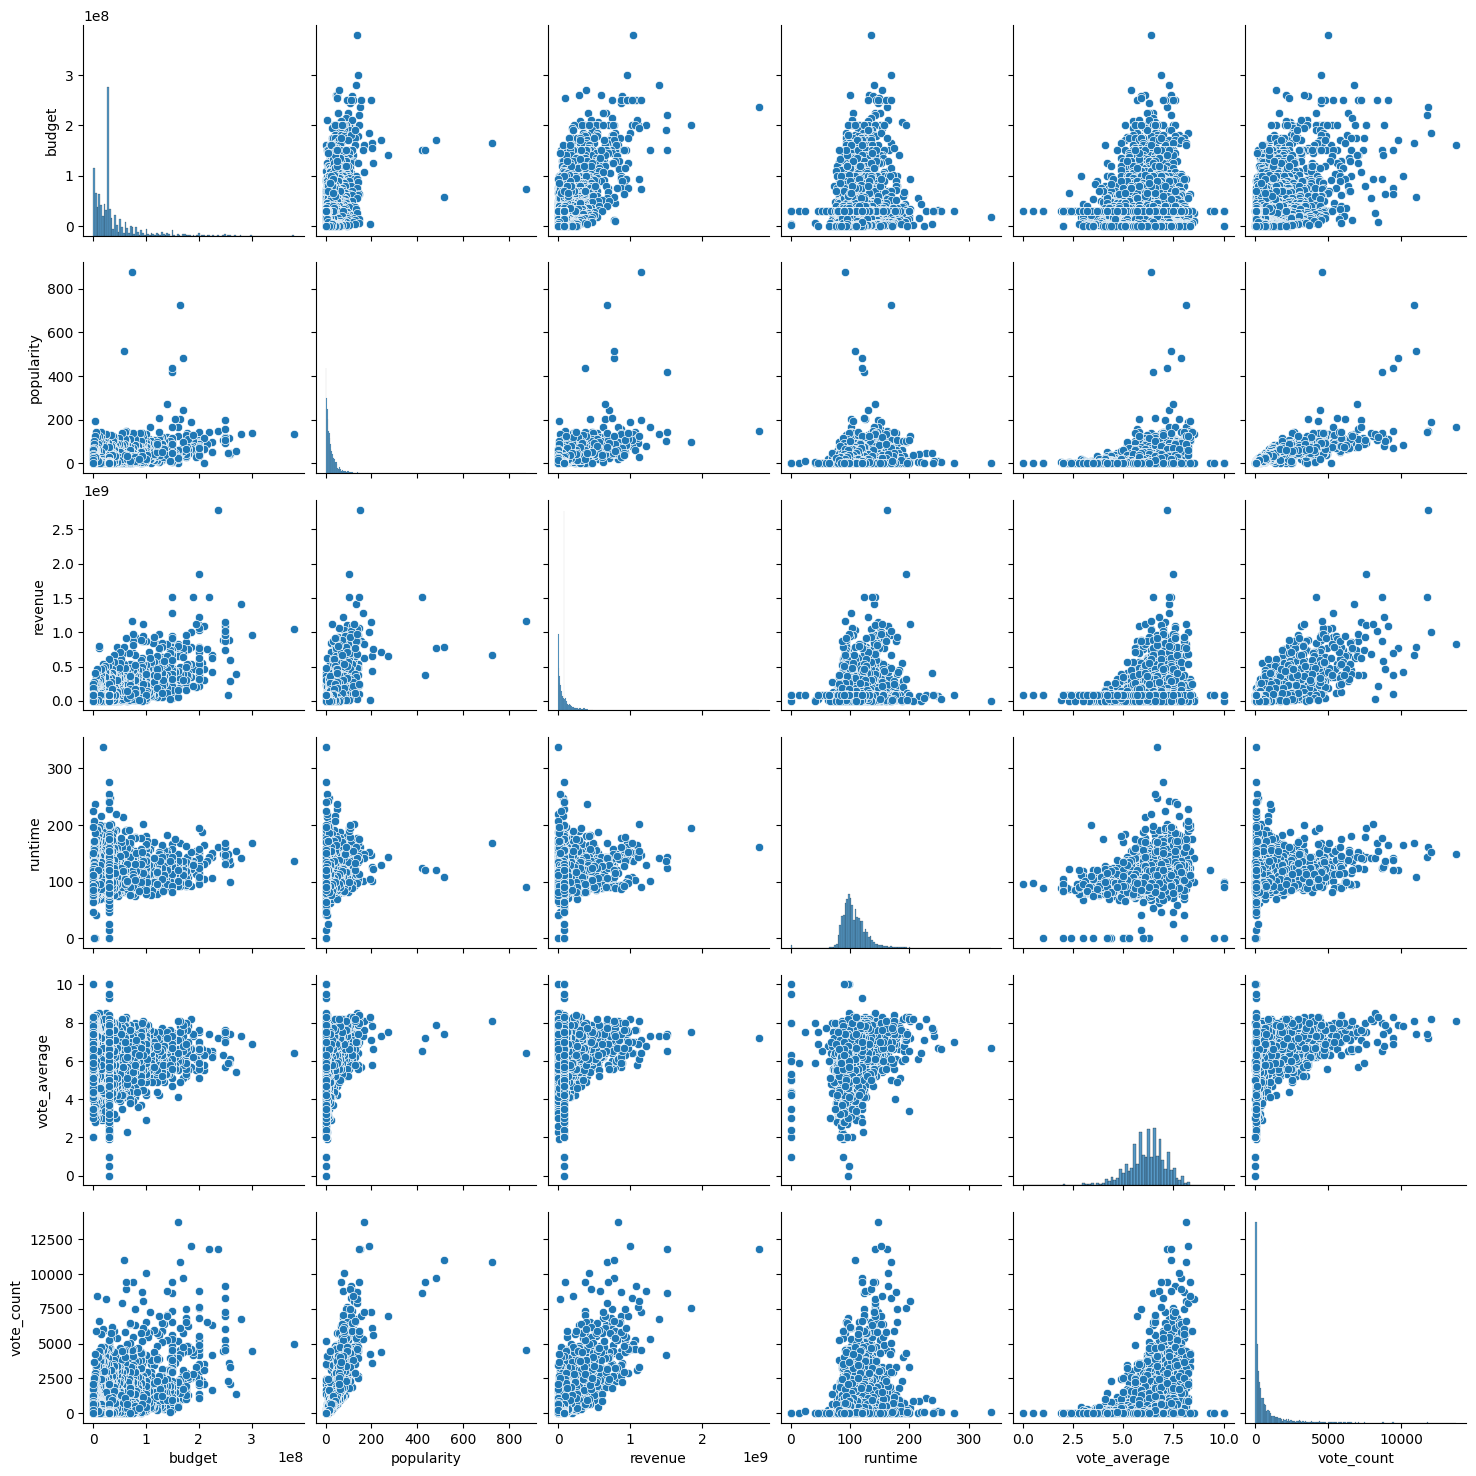

In [63]:
sns.pairplot(master, vars=["budget", "popularity", "revenue", "runtime", "vote_average","vote_count"]);

### **5.2:** Reflection

I would split up the genre and/or cast column and examine it more closely. It would be interesting to see if there are any correlations between CAST and popularity or even profit